<a href="https://colab.research.google.com/github/loaiwalid07/main/blob/main/CNNs%2CKeras_API_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style=' border:1;'><center>CNNs,Keras API and Regression</center></h1>

----
- By : ***Loai Nazeer***
----

**Load important Packages we will need**

In [ ]:
#!pip install pandas --upgrade

In [ ]:
import pandas as pd
import numpy as np
from numpy import expand_dims
import math
import time
import os
from os import listdir
from matplotlib import image
import matplotlib.pyplot as plt
import seaborn as sn
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from scipy import interp
from itertools import cycle
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout, BatchNormalization, Activation
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

# 1.1 Load the Dataset
###The images are part of a Leaf counting dataset by Teimouri et al.which can be downloaded from the Aarhus University, Denmark
***https://vision.eng.au.dk/leaf-counting-dataset/***


In [ ]:
# import zipfile
# with zipfile.ZipFile("testing.zip","r") as zip_ref:
#     zip_ref.extractall("./")

In [ ]:
# insert the files name of the dataset
train_dic="./training/"
test_dic="./testing/"
list_files = ['1', '2', '3', '4', '6']
list_files

['1', '2', '3', '4', '6']

In [ ]:
# Load the images as array and save them in a list

def load_file (file,label):
    image_list = []
    y=[]
    filenames=os.listdir(file)
    for filename in filenames:
        img_data = io.imread(file+'/'+filename) 
        # Here we load each image and we can convert it to grayscale with 
        # make "as.gray=True" but we will use rgb2gray function
        image_list.append(img_data)
        print('> loaded %s | %s' % (filename, img_data.shape))
        y.append(int(label))
    return image_list,y

In [ ]:
#Load training dataset in list
x,y=[],[]
for i in range(len(list_files)):
    x+=(load_file(train_dic+list_files[i],i)[0])
    y+=(load_file(train_dic+list_files[i],i)[1])

> loaded 95.png | (157, 157, 3)
> loaded 62.png | (295, 295, 3)
> loaded 172.png | (249, 249, 3)
> loaded 217.png | (129, 129, 3)
> loaded 12.png | (113, 113, 3)
> loaded 225.png | (115, 115, 3)
> loaded 180.png | (143, 143, 3)
> loaded 215.png | (149, 149, 3)
> loaded 84.png | (129, 129, 3)
> loaded 111.png | (125, 125, 3)
> loaded 170.png | (105, 105, 3)
> loaded 65.png | (245, 245, 3)
> loaded 165.png | (129, 129, 3)
> loaded 182.png | (115, 115, 3)
> loaded 190.png | (225, 225, 3)
> loaded 107.png | (83, 83, 3)
> loaded 176.png | (117, 117, 3)
> loaded 226.png | (219, 219, 3)
> loaded 145.png | (97, 97, 3)
> loaded 254.png | (289, 289, 3)
> loaded 113.png | (195, 195, 3)
> loaded 30.png | (211, 211, 3)
> loaded 76.png | (261, 261, 3)
> loaded 116.png | (223, 223, 3)
> loaded 185.png | (159, 159, 3)
> loaded 96.png | (129, 129, 3)
> loaded 248.png | (143, 143, 3)
> loaded 46.png | (159, 159, 3)
> loaded 122.png | (171, 171, 3)
> loaded 277.png | (219, 219, 3)
> loaded 105.png | (161

In [ ]:
#Load testing dataset in list
x_test,y_test=[],[]
for i in range(len(list_files)):
    x_test+=(load_file(test_dic+list_files[i],i)[0])
    y_test+=(load_file(test_dic+list_files[i],i)[1])

> loaded 286.png | (303, 303, 3)
> loaded 303.png | (241, 241, 3)
> loaded 307.png | (187, 187, 3)
> loaded 293.png | (137, 137, 3)
> loaded 290.png | (319, 319, 3)
> loaded 294.png | (209, 209, 3)
> loaded 288.png | (103, 103, 3)
> loaded 281.png | (245, 245, 3)
> loaded 279.png | (193, 193, 3)
> loaded 304.png | (367, 367, 3)
> loaded 301.png | (897, 897, 3)
> loaded 282.png | (113, 113, 3)
> loaded 295.png | (209, 209, 3)
> loaded 284.png | (121, 121, 3)
> loaded 311.png | (115, 115, 3)
> loaded 289.png | (137, 137, 3)
> loaded 292.png | (145, 145, 3)
> loaded 296.png | (163, 163, 3)
> loaded 283.png | (117, 117, 3)
> loaded 305.png | (107, 107, 3)
> loaded 286.png | (303, 303, 3)
> loaded 303.png | (241, 241, 3)
> loaded 307.png | (187, 187, 3)
> loaded 293.png | (137, 137, 3)
> loaded 290.png | (319, 319, 3)
> loaded 294.png | (209, 209, 3)
> loaded 288.png | (103, 103, 3)
> loaded 281.png | (245, 245, 3)
> loaded 279.png | (193, 193, 3)
> loaded 304.png | (367, 367, 3)
> loaded 3

(181, 181, 3)

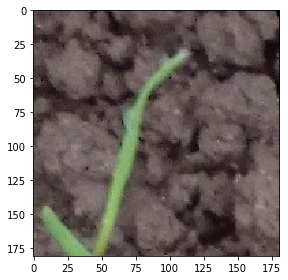

In [ ]:
io.imshow(x[70])
x[70].shape

In [ ]:
# Resize the images

def resize_data(img_gray_list,hight,width):
    final_data=[]
    for i in img_gray_list:
        final_data.append(resize(i, (hight,width)))
    return final_data

In [ ]:
x = resize_data(x,128,128)
X_test=np.array(resize_data(x_test,128,128))

(128, 128, 3)

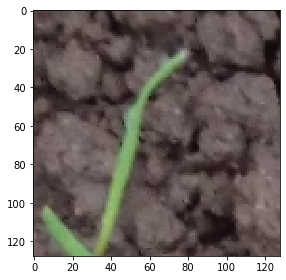

In [ ]:
io.imshow(x[70])
x[70].shape

In [ ]:
def conf_matrix(model,x_,y_):
    ax= plt.subplot()
    y_pred_prob = model.predict(x_)
    y_predic = y_pred_prob.argmax(axis=-1)
    conf_ = confusion_matrix(y_, y_predic)
    print('Confusion matrix: \n{0}'.format(conf_))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(conf_, annot=True, annot_kws={"size": 12},ax=ax) # font size
    ax.xaxis.set_ticklabels(['1', '2', '3', '4', '6']); ax.yaxis.set_ticklabels(['1', '2', '3', '4', '6']);
    plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(np.array(x), y, test_size=1.0/7, stratify=y, random_state=42)
print('{0} samples for training'.format(len(X_train)))
print('{0} samples for Validation'.format(len(X_val)))
print('{0} samples for Testing'.format(len(X_test)))

771 samples for training
129 samples for Validation
100 samples for Testing


**Classification Network**

In [ ]:
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

# last layers output
x = vgg_model.layers[6].output

x = Conv2D(64,(3,3))(x)
x = Flatten()(x)
x = Dense(1028, activation='relu')(x)
x = Dense(514, activation='tanh')(x)
x = Dense(256, activation='relu')(x)
x = Dense(5, activation='softmax')(x)

from tensorflow.keras.models import Model
vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)
print(vgg_model_transfer.summary())

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

In [ ]:
# one hot encodeing
nClasses = 5
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_val_k = tensorflow.keras.utils.to_categorical(y_val, num_classes=nClasses)

In [ ]:
batchSize = 21
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer.compile(loss="categorical_crossentropy", 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = vgg_model_transfer.fit(X_train,y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_val, y_val_k))


Epoch 1/32
37/37 [==============================] - 1s 32ms/step - loss: 1.7434 - accuracy: 0.2391 - val_loss: 1.6870 - val_accuracy: 0.1705
Epoch 2/32
37/37 [==============================] - 1s 28ms/step - loss: 1.5967 - accuracy: 0.2861 - val_loss: 1.6363 - val_accuracy: 0.2713
Epoch 3/32
37/37 [==============================] - 1s 28ms/step - loss: 1.5540 - accuracy: 0.2761 - val_loss: 1.6106 - val_accuracy: 0.2403
Epoch 4/32
37/37 [==============================] - 1s 28ms/step - loss: 1.5667 - accuracy: 0.3051 - val_loss: 1.6307 - val_accuracy: 0.2093
Epoch 5/32
37/37 [==============================] - 1s 28ms/step - loss: 1.5325 - accuracy: 0.3176 - val_loss: 1.5958 - val_accuracy: 0.2558
Epoch 6/32
37/37 [==============================] - 1s 28ms/step - loss: 1.4893 - accuracy: 0.3496 - val_loss: 1.6457 - val_accuracy: 0.2946
Epoch 7/32
37/37 [==============================] - 1s 28ms/step - loss: 1.3867 - accuracy: 0.4321 - val_loss: 1.6665 - val_accuracy: 0.3101
Epoch 8/32
37

Confusion matrix: 
[[154   0   0   0   0]
 [  0 155   0   0   0]
 [  0   0 154   0   0]
 [  0   0   0 154   0]
 [  0   0   0   0 154]]


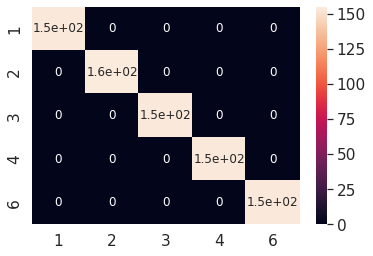

Confusion matrix: 
[[19  1  4  1  1]
 [ 8  7  4  4  2]
 [ 1  7  2 10  6]
 [ 2  6  4 12  2]
 [ 3  3  8  7  5]]


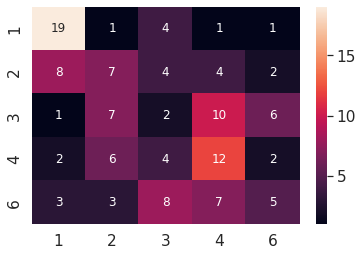

In [ ]:
#confusion matrix for training and validtion dataset
conf_matrix(vgg_model_transfer,X_train,y_train)
conf_matrix(vgg_model_transfer,X_val,y_val)

Confusion matrix: 
[[8 4 4 1 3]
 [8 7 3 1 1]
 [3 4 5 2 6]
 [1 3 3 7 6]
 [2 3 3 3 9]]


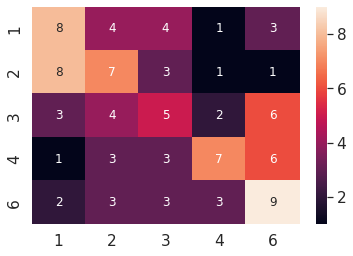

In [ ]:
#confusion matrix for test dataset
conf_matrix(vgg_model_transfer,X_test,y_test)

In [ ]:
y_pred_tr=vgg_model_transfer.predict(X_train).argmax(axis=-1)
y_pred_val= vgg_model_transfer.predict(X_val).argmax(axis=-1)
y_pred_ts=vgg_model_transfer.predict(X_test).argmax(axis=-1)

In [ ]:
print("classification report for Trainig")
print(classification_report(y_train, y_pred_tr, target_names=list_files))
print("classification report for Validition")
print(classification_report(y_val, y_pred_val, target_names=list_files))
print("classification report for testing")
print(classification_report(y_test, y_pred_ts, target_names=list_files))

classification report for Trainig
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       155
           3       1.00      1.00      1.00       154
           4       1.00      1.00      1.00       154
           6       1.00      1.00      1.00       154

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771

classification report for Validition
              precision    recall  f1-score   support

           1       0.58      0.73      0.64        26
           2       0.29      0.28      0.29        25
           3       0.09      0.08      0.08        26
           4       0.35      0.46      0.40        26
           6       0.31      0.19      0.24        26

    accuracy                           0.35       129
   macro avg       0.32      0.35      0.33       129
weight

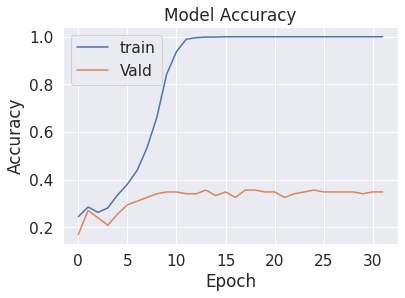

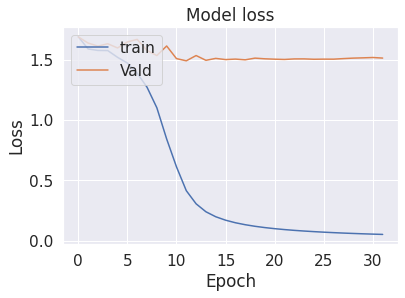

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Vald'], loc='upper left')
    plt.show()
    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Vald'], loc='upper left')
plt.show()


**Regression Network**

In [ ]:
import keras

In [ ]:
#Now we will build the same model but we will change the output layer
for layer in vgg_model.layers:
    layer.trainable = False
# last layers output
x = vgg_model.layers[6].output
# Flatten as before
x = Conv2D(64,(3,3))(x)
x = Flatten()(x)
x = Dense(1028, activation='relu')(x)
x = Dense(564, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='relu')(x)

from tensorflow.keras.models import Model
vgg_model_reg = Model(inputs=vgg_model.input, outputs=x)
print(vgg_model_reg.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
batchSize = 21
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_reg.compile(loss='mse', 
                           optimizer=sgd, 
                           metrics=["mse"])


history = vgg_model_reg.fit(X_train, np.array(y_train), batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_val, np.array(y_val)))

Epoch 1/32
37/37 [==============================] - 2s 30ms/step - loss: 6.9468 - mse: 6.9468 - val_loss: 6.0388 - val_mse: 6.0388
Epoch 2/32
37/37 [==============================] - 1s 26ms/step - loss: 6.0398 - mse: 6.0398 - val_loss: 6.0388 - val_mse: 6.0388
Epoch 3/32
37/37 [==============================] - 1s 26ms/step - loss: 5.9714 - mse: 5.9714 - val_loss: 6.0388 - val_mse: 6.0388
Epoch 4/32
37/37 [==============================] - 1s 26ms/step - loss: 6.2245 - mse: 6.2245 - val_loss: 6.0388 - val_mse: 6.0388
Epoch 5/32
37/37 [==============================] - 1s 26ms/step - loss: 6.1408 - mse: 6.1408 - val_loss: 6.0388 - val_mse: 6.0388
Epoch 6/32
37/37 [==============================] - 1s 26ms/step - loss: 5.9971 - mse: 5.9971 - val_loss: 6.0388 - val_mse: 6.0388
Epoch 7/32
37/37 [==============================] - 1s 26ms/step - loss: 5.8347 - mse: 5.8347 - val_loss: 6.0388 - val_mse: 6.0388
Epoch 8/32
37/37 [==============================] - 1s 26ms/step - loss: 5.6173 - m

Confusion matrix: 
[[154   0   0   0   0]
 [155   0   0   0   0]
 [154   0   0   0   0]
 [154   0   0   0   0]
 [154   0   0   0   0]]


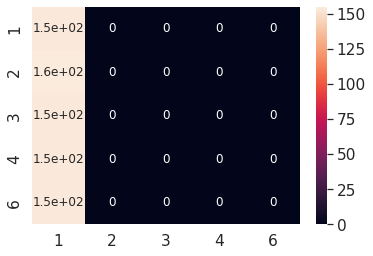

The Mean Squared Error for Train ->  5.993514915693904


In [ ]:
#confusion matrix training dataset
ax= plt.subplot()
y_predict_reg = vgg_model_reg.predict(X_train)
y_predict_reg=(np.rint(y_predict_reg)).astype(int)
conf_mx_reg = confusion_matrix(y_train, y_predict_reg)
print('Confusion matrix: \n{0}'.format(conf_mx_reg))
sn.set(font_scale=1.4) # for label size
sn.heatmap(conf_mx_reg, annot=True, annot_kws={"size": 12},ax=ax) # font size
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '6']); ax.yaxis.set_ticklabels(['1', '2', '3', '4', '6']);
plt.show()

print("The Mean Squared Error for Train -> ",mean_squared_error(y_train, y_predict_reg))

Confusion matrix: 
[[26  0  0  0  0]
 [25  0  0  0  0]
 [26  0  0  0  0]
 [26  0  0  0  0]
 [26  0  0  0  0]]


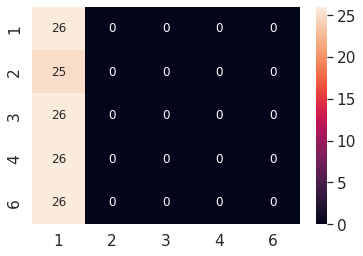

The Mean Squared Error for Validation ->  6.038759689922481


In [ ]:
#confusion matrix validation dataset
ax= plt.subplot()
y_predict_reg = vgg_model_reg.predict(X_val)
y_predict_reg=(np.rint(y_predict_reg)).astype(int)
conf_mx_reg = confusion_matrix(y_val, y_predict_reg)
print('Confusion matrix: \n{0}'.format(conf_mx_reg))
sn.set(font_scale=1.4) # for label size
sn.heatmap(conf_mx_reg, annot=True, annot_kws={"size": 12},ax=ax) # font size
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '6']); ax.yaxis.set_ticklabels(['1', '2', '3', '4', '6']);
plt.show()
print("The Mean Squared Error for Validation -> ",mean_squared_error(y_val, y_predict_reg))

Confusion matrix: 
[[20  0  0  0  0]
 [20  0  0  0  0]
 [20  0  0  0  0]
 [20  0  0  0  0]
 [20  0  0  0  0]]


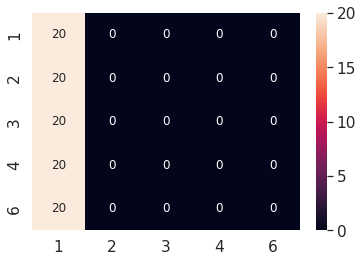

The Mean Squared Error for Testing ->  6.0


In [ ]:
#confusion matrix testing dataset
ax= plt.subplot()
y_predict_reg = vgg_model_reg.predict(X_test)
y_predict_reg=(np.rint(y_predict_reg)).astype(int)
conf_mx_reg = confusion_matrix(y_test, y_predict_reg)
print('Confusion matrix: \n{0}'.format(conf_mx_reg))
sn.set(font_scale=1.4) # for label size
sn.heatmap(conf_mx_reg, annot=True, annot_kws={"size": 12},ax=ax) # font size
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '6']); ax.yaxis.set_ticklabels(['1', '2', '3', '4', '6']);
plt.show()
print("The Mean Squared Error for Testing -> ",mean_squared_error(y_test, y_predict_reg))

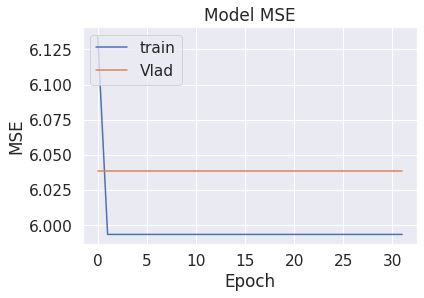

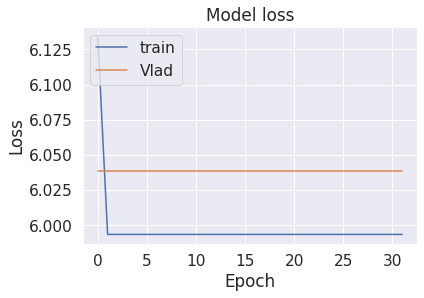

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'mse' in history.history :
    k = 'mse'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Vlad'], loc='upper left')
    plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Vlad'], loc='upper left')
plt.show()


**Discussion**

In the classification model, we can see that have an overfitting problem, but in regression model, we have an underfitting problem and the model only can recognize one class.
So we will select the classification model for the next steps.

**Regularization**

we will use the classifiction nenwork for making the regularization

In [ ]:
print(vgg_model_transfer.summary())

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

# last layers output
x = vgg_model_transfer.layers[-2].output

x = Dropout(0.3)(x)
x = Flatten()(x)
#x = Dense(564, activation='relu')(x)
#x = Dense(50, activation='tanh')(x)
x = BatchNormalization(axis=-1)(x)
x = Dense(5, activation='softmax')(x)
from tensorflow.keras.models import Model
vgg_model_regu = Model(inputs=vgg_model_transfer.input, outputs=x)
print(vgg_model_regu.summary())

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

In [ ]:
batchSize = 21
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_regu.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=["accuracy"])


history = vgg_model_regu.fit(X_train, np.array(y_train_k), batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_val, np.array(y_val_k)))

Epoch 1/32
37/37 [==============================] - 2s 32ms/step - loss: 1.8594 - accuracy: 0.2851 - val_loss: 1.7723 - val_accuracy: 0.2016
Epoch 2/32
37/37 [==============================] - 1s 28ms/step - loss: 1.8415 - accuracy: 0.2356 - val_loss: 1.7009 - val_accuracy: 0.2016
Epoch 3/32
37/37 [==============================] - 1s 28ms/step - loss: 1.9177 - accuracy: 0.2147 - val_loss: 1.8944 - val_accuracy: 0.2016
Epoch 4/32
37/37 [==============================] - 1s 28ms/step - loss: 1.8463 - accuracy: 0.2874 - val_loss: 1.6724 - val_accuracy: 0.1473
Epoch 5/32
37/37 [==============================] - 1s 28ms/step - loss: 1.8755 - accuracy: 0.2374 - val_loss: 1.9712 - val_accuracy: 0.1860
Epoch 6/32
37/37 [==============================] - 1s 28ms/step - loss: 1.7681 - accuracy: 0.2418 - val_loss: 1.6582 - val_accuracy: 0.2016
Epoch 7/32
37/37 [==============================] - 1s 28ms/step - loss: 1.8494 - accuracy: 0.2444 - val_loss: 1.6477 - val_accuracy: 0.2093
Epoch 8/32
37

Confusion matrix: 
[[154   0   0   0   0]
 [  0 155   0   0   0]
 [  0   0 154   0   0]
 [  0   0   0 154   0]
 [  0   0   0   0 154]]


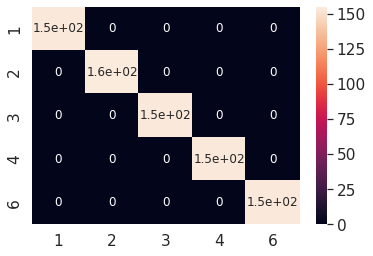

Confusion matrix: 
[[19  0  4  2  1]
 [ 7  6  1  9  2]
 [ 3  8  2 12  1]
 [ 5  7  3 10  1]
 [ 0  1  5 11  9]]


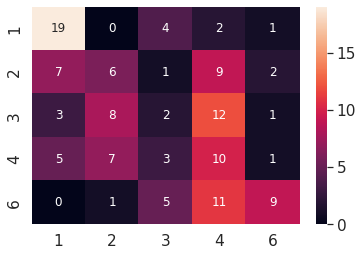

In [ ]:
#confusion matrix for training and validtion dataset
conf_matrix(vgg_model_regu,X_train,y_train)
conf_matrix(vgg_model_regu,X_val,y_val)

Confusion matrix: 
[[9 3 5 1 2]
 [5 7 4 4 0]
 [2 4 4 6 4]
 [0 3 4 7 6]
 [1 3 1 7 8]]


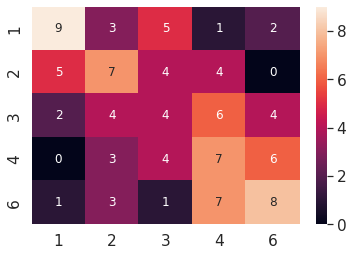

In [ ]:
#confusion matrix for test dataset
conf_matrix(vgg_model_regu,X_test,y_test)

In [ ]:
y_pred_tr_reg=vgg_model_regu.predict(X_train).argmax(axis=-1)
y_pred_val_reg= vgg_model_regu.predict(X_val).argmax(axis=-1)
y_pred_ts_reg=vgg_model_regu.predict(X_test).argmax(axis=-1)

In [ ]:
print("classification report for Trainig")
print(classification_report(y_train, y_pred_tr_reg, target_names=list_files))
print("classification report for Validition")
print(classification_report(y_val, y_pred_val_reg, target_names=list_files))
print("classification report for testing")
print(classification_report(y_test, y_pred_ts_reg, target_names=list_files))

classification report for Trainig
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       155
           3       1.00      1.00      1.00       154
           4       1.00      1.00      1.00       154
           6       1.00      1.00      1.00       154

    accuracy                           1.00       771
   macro avg       1.00      1.00      1.00       771
weighted avg       1.00      1.00      1.00       771

classification report for Validition
              precision    recall  f1-score   support

           1       0.56      0.73      0.63        26
           2       0.27      0.24      0.26        25
           3       0.13      0.08      0.10        26
           4       0.23      0.38      0.29        26
           6       0.64      0.35      0.45        26

    accuracy                           0.36       129
   macro avg       0.37      0.36      0.34       129
weight

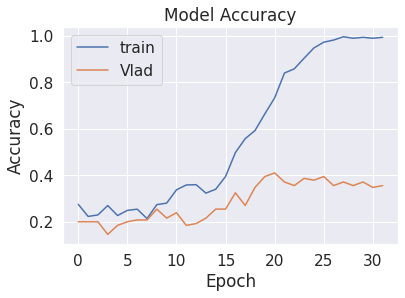

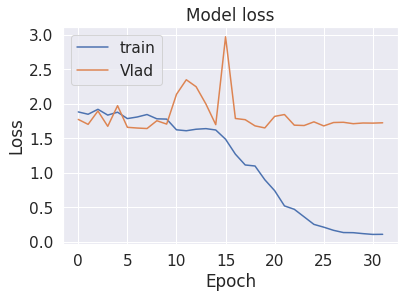

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Vlad'], loc='upper left')
    plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Vlad'], loc='upper left')
plt.show()


**Data Augmentation**

In [ ]:

datagen = ImageDataGenerator(
        rotation_range=40,
        #height_shift_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

In [ ]:
batchSize = 21
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_regu.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=["accuracy"])


history = vgg_model_regu.fit(datagen.flow(X_train, np.array(y_train_k)), batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_val, np.array(y_val_k)))

Epoch 1/32
25/25 [==============================] - 3s 109ms/step - loss: 1.5702 - accuracy: 0.2797 - val_loss: 1.6646 - val_accuracy: 0.2636
Epoch 2/32
25/25 [==============================] - 3s 101ms/step - loss: 1.4862 - accuracy: 0.3432 - val_loss: 1.8171 - val_accuracy: 0.2713
Epoch 3/32
25/25 [==============================] - 3s 102ms/step - loss: 1.5765 - accuracy: 0.3185 - val_loss: 2.1429 - val_accuracy: 0.2326
Epoch 4/32
25/25 [==============================] - 3s 103ms/step - loss: 1.5562 - accuracy: 0.3470 - val_loss: 7.0854 - val_accuracy: 0.2248
Epoch 5/32
25/25 [==============================] - 3s 102ms/step - loss: 1.6284 - accuracy: 0.2880 - val_loss: 2.6841 - val_accuracy: 0.2093
Epoch 6/32
25/25 [==============================] - 3s 102ms/step - loss: 1.6237 - accuracy: 0.3243 - val_loss: 1.6041 - val_accuracy: 0.3256
Epoch 7/32
25/25 [==============================] - 3s 102ms/step - loss: 1.5475 - accuracy: 0.3831 - val_loss: 2.4045 - val_accuracy: 0.1938
Epoch 

Confusion matrix: 
[[128   1   8   4  13]
 [ 59  32  13  30  21]
 [ 32   4  11  28  79]
 [ 15   2   4  50  83]
 [  1   0   4  30 119]]


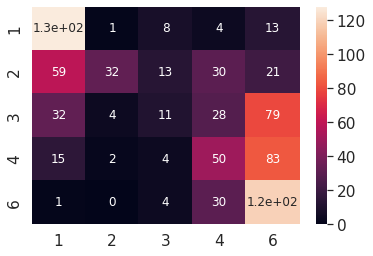

Confusion matrix: 
[[20  0  2  1  3]
 [ 9  1  2  8  5]
 [ 5  1  0  7 13]
 [ 4  1  2  5 14]
 [ 0  0  0  5 21]]


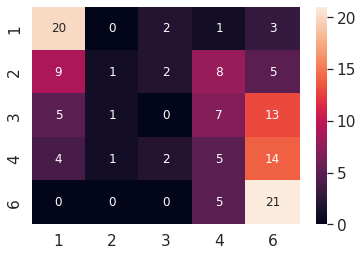

In [ ]:
#confusion matrix for training and validtion dataset
conf_matrix(vgg_model_regu,X_train,y_train)
conf_matrix(vgg_model_regu,X_val,y_val)

Confusion matrix: 
[[ 9  0  3  2  6]
 [ 8  1  2  2  7]
 [ 6  0  2  2 10]
 [ 1  0  1  8 10]
 [ 1  0  0  6 13]]


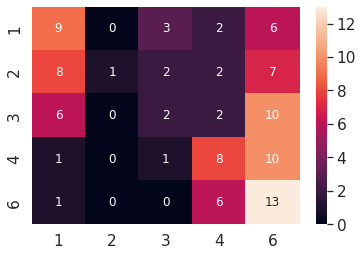

In [ ]:
#confusion matrix for test dataset
conf_matrix(vgg_model_regu,X_test,y_test)

In [ ]:
y_pred_tr_agu=vgg_model_regu.predict(X_train).argmax(axis=-1)
y_pred_val_agu= vgg_model_regu.predict(X_val).argmax(axis=-1)
y_pred_ts_agu=vgg_model_regu.predict(X_test).argmax(axis=-1)

In [ ]:
print("classification report for Trainig")
print(classification_report(y_train, y_pred_tr_agu, target_names=list_files))
print("classification report for Validition")
print(classification_report(y_val, y_pred_val_agu, target_names=list_files))
print("classification report for testing")
print(classification_report(y_test, y_pred_ts_agu, target_names=list_files))

classification report for Trainig
              precision    recall  f1-score   support

           1       0.54      0.83      0.66       154
           2       0.82      0.21      0.33       155
           3       0.28      0.07      0.11       154
           4       0.35      0.32      0.34       154
           6       0.38      0.77      0.51       154

    accuracy                           0.44       771
   macro avg       0.47      0.44      0.39       771
weighted avg       0.47      0.44      0.39       771

classification report for Validition
              precision    recall  f1-score   support

           1       0.53      0.77      0.62        26
           2       0.33      0.04      0.07        25
           3       0.00      0.00      0.00        26
           4       0.19      0.19      0.19        26
           6       0.38      0.81      0.51        26

    accuracy                           0.36       129
   macro avg       0.29      0.36      0.28       129
weight

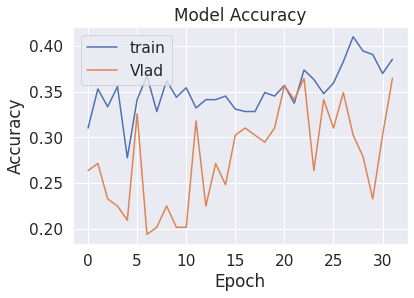

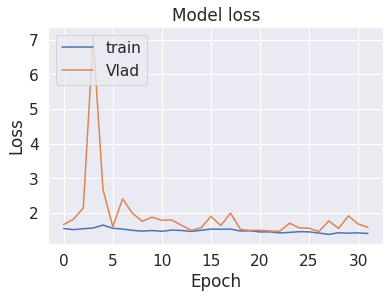

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Vlad'], loc='upper left')
    plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Vlad'], loc='upper left')
plt.show()


**Discussion**

We can see after regularization and data augmentation the model have a better performance after regularization the overfitting decreased but still have some overfitting.

After data augmentation, we can see that we have decreased the overfitting, but the model become weak.
So, finally, we can see that data augmentation does not improve the model but regularization increase a little the performance of the model.